In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [2]:
df=pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.shape

(30, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

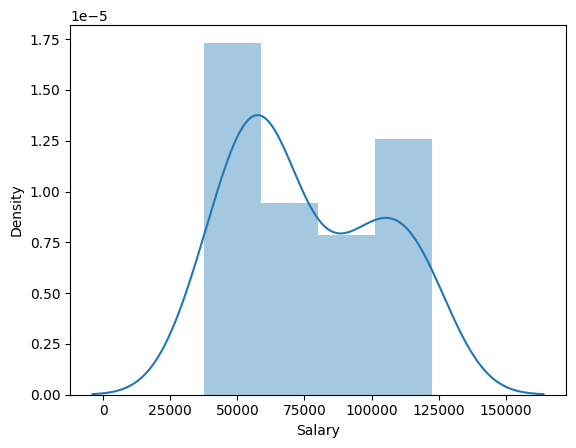

In [7]:
# Visualization

sns.distplot(df['Salary'])
plt.show()

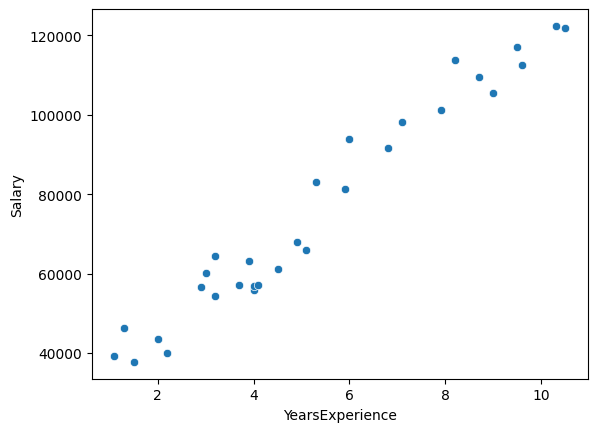

In [8]:
plt.figure()
sns.scatterplot(data=df,x='YearsExperience',y='Salary')
plt.show()

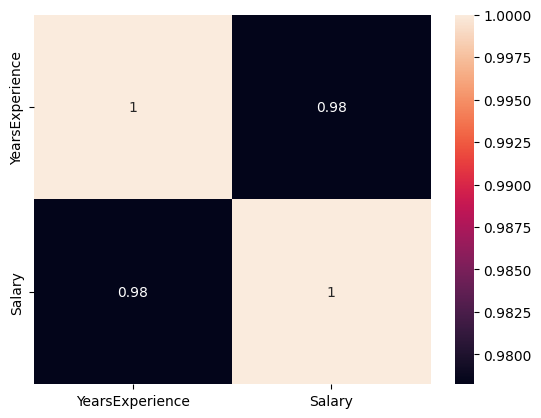

In [9]:
plt.figure()
sns.heatmap(df.corr(),annot=True)
plt.show()

In [10]:
# Linear Regression

x=df['YearsExperience']
y=df['Salary']

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [12]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

In [13]:
lr.fit(np.array(x_train).reshape(-1,1),y_train)

LinearRegression()

In [14]:
lr.intercept_

26049.577715443353

In [15]:
lr.coef_

array([9202.23359825])

In [16]:
y_pred=lr.predict([[10.2]])
y_pred

array([119912.36041764])

In [17]:
y_pred = lr.predict(np.array(x_train).reshape(-1,1))
y_pred

array([ 98747.22314165, 101507.89322113,  46294.4916316 ,  39852.92811283,
       108869.68009974,  53656.27851021,  80342.75594515,  63778.73546829,
        55496.72522986, 114391.02025869,  38012.48139317,  72980.96906654,
        36172.03467352,  71140.52234689, 122673.03049712, 120832.58377747,
        60097.84202899,  55496.72522986,  62858.51210846,  62858.51210846,
        52736.05515038])

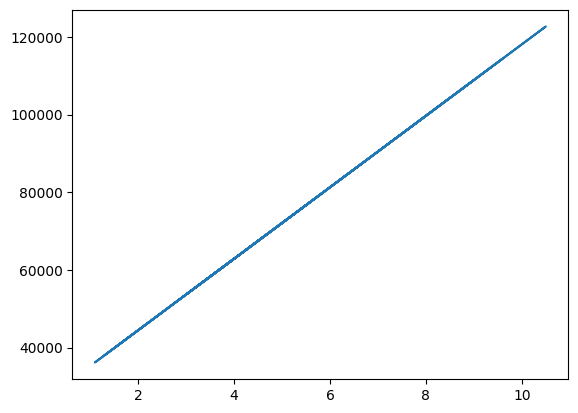

In [18]:
plt.figure()
#sns.scatterplot(x_train,y_train)
plt.plot(x_train,y_pred)
plt.show()

In [19]:
y_pred = lr.predict(np.array(x_test).reshape(-1,1))
y_pred

array([ 74821.41578619,  91385.43626305,  61938.28874864,  81262.97930497,
        67459.62890759,  88624.76618357, 113470.79689886,  44454.04491195,
       106109.01002026])

In [20]:
# Evaluation of model

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mse)
print(rmse)
print(mae)
print(r2)

39139215.99958858
6256.134269625979
5146.886734888234
0.9248580247217075
